### Imports and Setup

In [1]:
import pandas as pd
import os                    
import matplotlib.pyplot as plt          
import numpy as np 
import scipy.stats as st

from ipywidgets.embed import embed_minimal_html as export
from matplotlib import rcParams
from IPython.display import display

### Retrieving Data

In [2]:
# Reading in state data
Vic_Employment_data = pd.read_csv("data/output_data/clean_filter/vic_emp.csv")
QLD_Employment_data = pd.read_csv("data/output_data/clean_filter/qld_emp.csv")
WA_Employment_data = pd.read_csv("data/output_data/clean_filter/WA_emp.csv")

# Reading in unemployment data for arrivals
arrivals_df = pd.read_csv("data/output_data/tourism_arrivals_data.csv")
unemployment_df=pd.read_csv ('data/output_data/clean_data/unemployment_clean.csv')

# Reading in departures data
departures_df = pd.read_csv("data/output_data/tourism_dep_data.csv")
# Reading in unemployment data for departures
unemployment_df_dep = pd.read_csv("data/output_data/clean_filter/australia_emp.csv")

## Unemployment Graphs

In [3]:
data_file = pd.ExcelFile('data/labourforce.xls')
labourforce_data = pd.read_excel(data_file, 'Index')

sheet1 =  pd.read_excel(data_file, 'Data1')
sheet2 =  pd.read_excel(data_file, 'Data2')
sheet3 =  pd.read_excel(data_file, 'Data3')
sheet4 =  pd.read_excel(data_file, 'Data4')

display(labourforce_data.shape)

print(sheet1.shape, sheet2.shape, sheet3.shape, sheet4.shape)

sheet1_inter = sheet1.iloc[-51:]
sheet2_inter = sheet2.iloc[-51:]
sheet3_inter = sheet3.iloc[-51:]
sheet4_inter = sheet4.iloc[-51:]

merged_dt = pd.merge(sheet1_inter, sheet2_inter)
merged_dt = pd.merge(merged_dt, sheet3_inter)
merged_dt = pd.merge(merged_dt, sheet4_inter)
merged_dt = merged_dt.dropna(how = 'all')
merged_dt = merged_dt.dropna(axis = 'columns', how = 'all')
#merged_dt.to_csv('out_dt_test.csv')

print(merged_dt.shape)

selected_columns = pd.read_csv('data/selected_data_columns.csv')

cols_names = list(selected_columns['Selected Columns'])

filtered_data = merged_dt[cols_names]
filtered_data = filtered_data.rename({'Unnamed: 0': 'Months'}, axis = 'columns')
filtered_data['Months'] = [a.date() for a in filtered_data['Months']]
                           
print(filtered_data.shape)

(894, 12)

(362, 251) (362, 251) (362, 251) (362, 133)
(51, 883)
(51, 25)


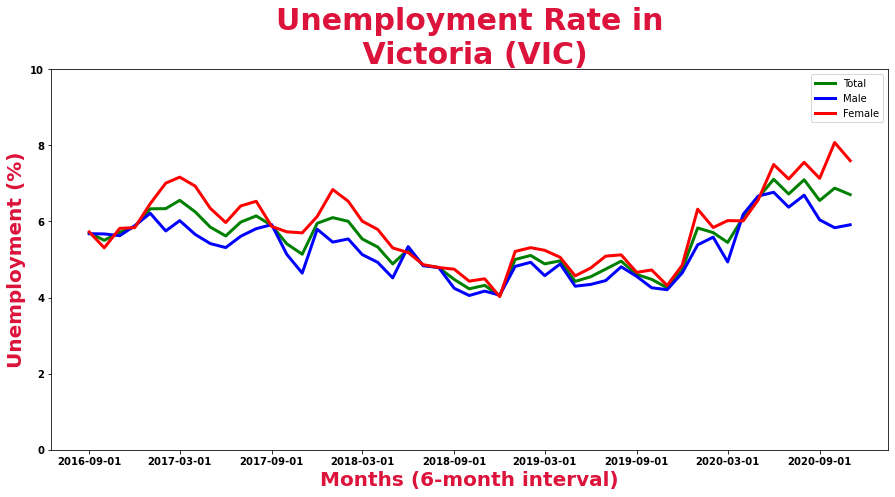

In [4]:
plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'], filtered_data[cols_names[1]], '-g', label = 'Total', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[2]], '-b', label = 'Male', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[3]], '-r', label = 'Female', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.yticks([i for i in range(0, int(max(filtered_data[cols_names[1]]) + 5), 2)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Unemployment Rate in\n' + cols_names[1].split(';')[0][1:-1] + ' (VIC)', fontsize = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Unemployment (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

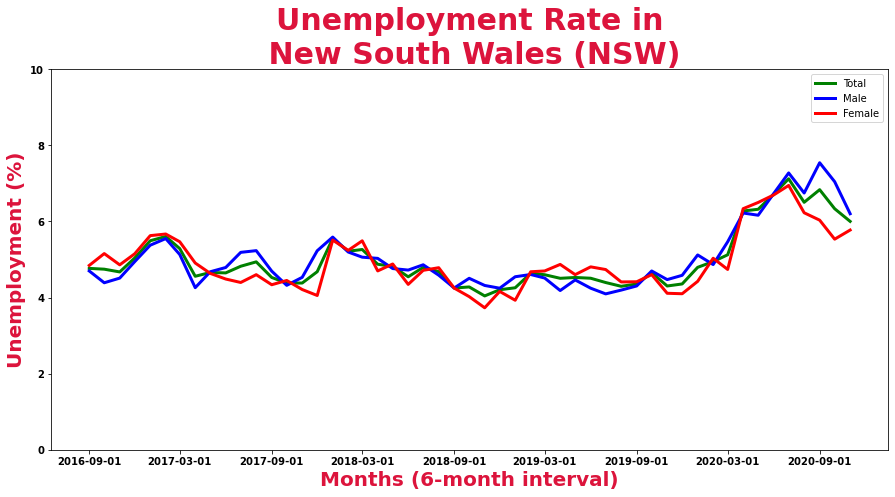

In [5]:
plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'], filtered_data[cols_names[4]], '-g', label = 'Total', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[5]], '-b', label = 'Male', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[6]], '-r', label = 'Female', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.yticks([i for i in range(0, int(max(filtered_data[cols_names[1]]) + 5), 2)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Unemployment Rate in\n' + cols_names[4].split(';')[0][1:-1] + ' (NSW)', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Unemployment (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

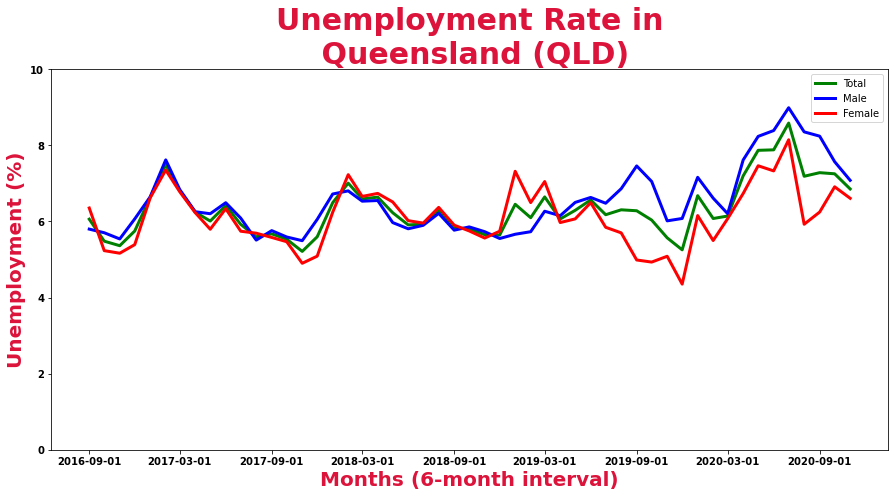

In [6]:
plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'], filtered_data[cols_names[7]], '-g', label = 'Total', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[8]], '-b', label = 'Male', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[9]], '-r', label = 'Female', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.yticks([i for i in range(0, int(max(filtered_data[cols_names[1]]) + 5), 2)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Unemployment Rate in\n' + cols_names[7].split(';')[0][1:-1] + ' (QLD)', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Unemployment (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

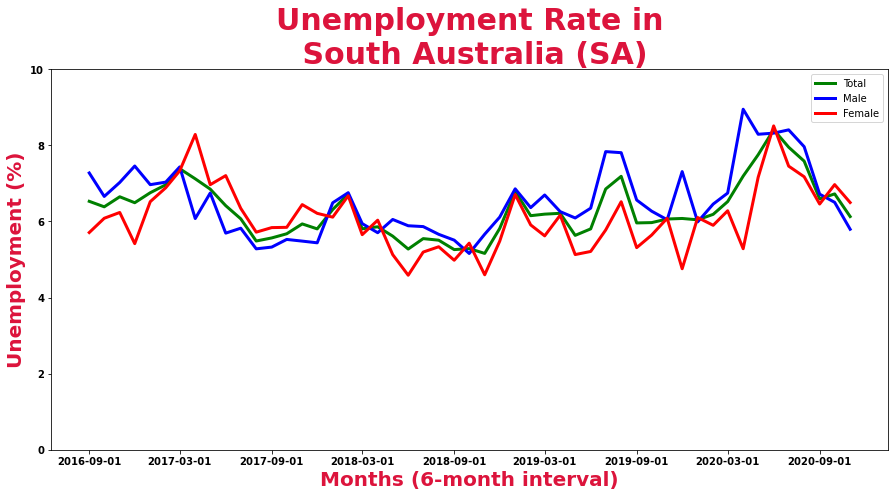

In [7]:
plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'], filtered_data[cols_names[10]], '-g', label = 'Total', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[11]], '-b', label = 'Male', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[12]], '-r', label = 'Female', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.yticks([i for i in range(0, int(max(filtered_data[cols_names[1]]) + 5), 2)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Unemployment Rate in\n' + cols_names[10].split(';')[0][1:-1] + ' (SA)', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Unemployment (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

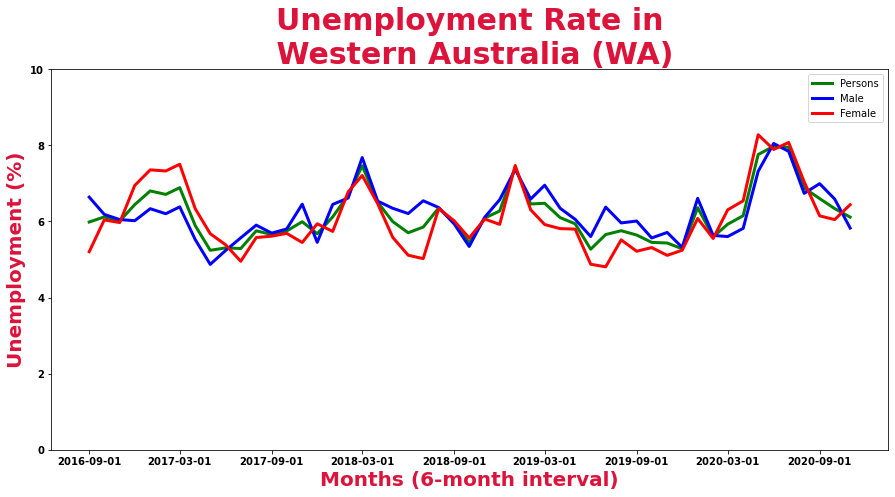

In [8]:
plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'], filtered_data[cols_names[13]], '-g', label = 'Persons', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[14]], '-b', label = 'Male', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[15]], '-r', label = 'Female', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.yticks([i for i in range(0, int(max(filtered_data[cols_names[1]]) + 5), 2)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Unemployment Rate in\n' + cols_names[13].split(';')[0][1:-1] + ' (WA)', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Unemployment (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

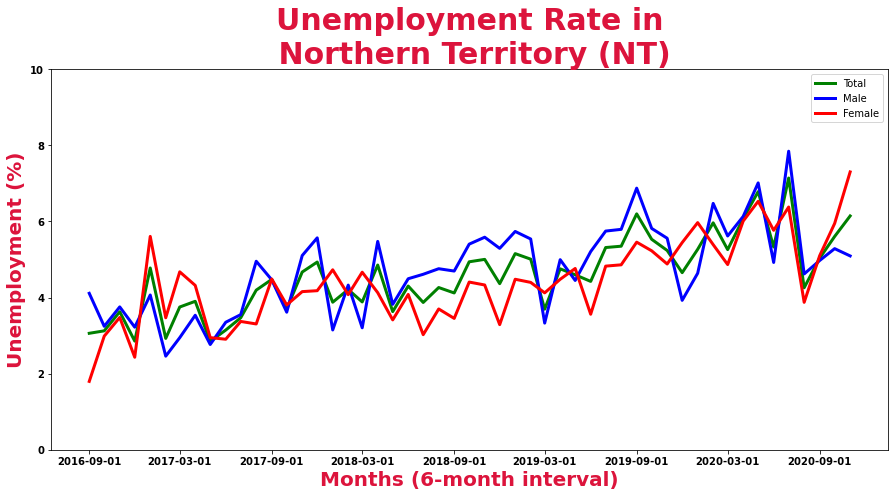

In [9]:
plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'], filtered_data[cols_names[16]], '-g', label = 'Total', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[17]], '-b', label = 'Male', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[18]], '-r', label = 'Female', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation='horizontal', fontweight = 'bold')
plt.yticks([i for i in range(0, int(max(filtered_data[cols_names[1]]) + 5), 2)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Unemployment Rate in\n' + cols_names[16].split(';')[0][1:-1] + ' (NT)', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Unemployment (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

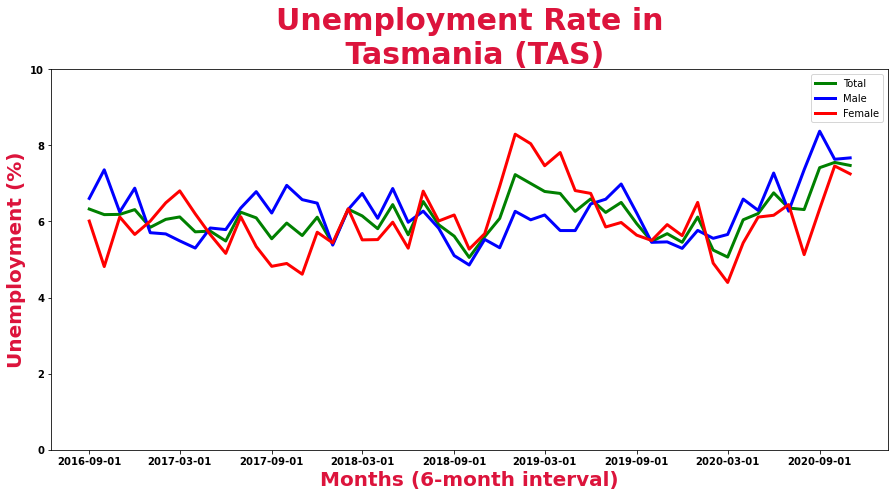

In [10]:
plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'], filtered_data[cols_names[19]], '-g', label = 'Total', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[20]], '-b', label = 'Male', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[21]], '-r', label = 'Female', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.yticks([i for i in range(0, int(max(filtered_data[cols_names[1]]) + 5), 2)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Unemployment Rate in\n' + cols_names[19].split(';')[0][1:-1] + ' (TAS)', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Unemployment (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

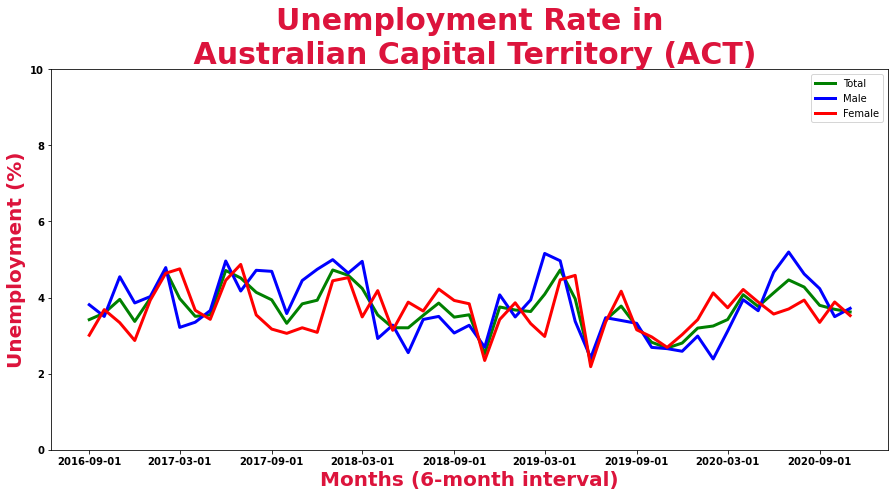

In [11]:
plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'], filtered_data[cols_names[22]], '-g', label = 'Total', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[23]], '-b', label = 'Male', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[24]], '-r', label = 'Female', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.yticks([i for i in range(0, int(max(filtered_data[cols_names[1]]) + 5), 2)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Unemployment Rate in\n' + cols_names[22].split(';')[0][1:-1] + ' (ACT)', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Unemployment (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

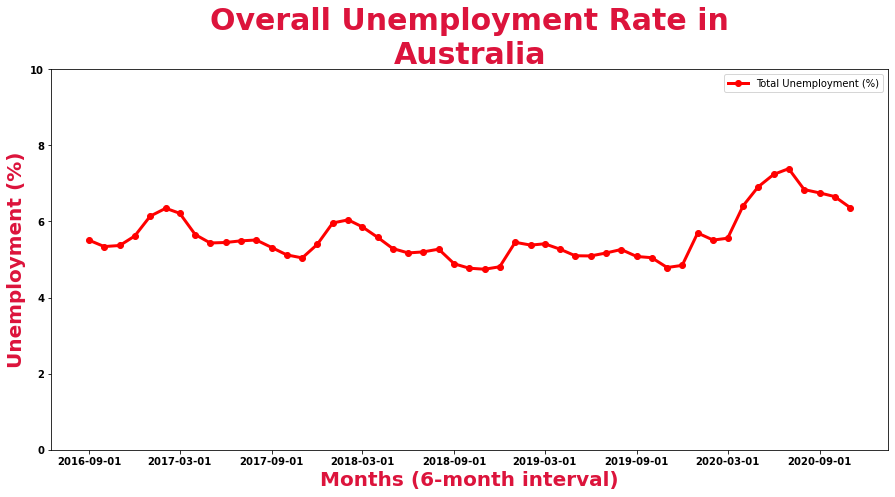

In [12]:
plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'], list(merged_dt['Australia ;  Unemployment rate ;  Persons ;']), '-o', c = 'r', label = 'Total Unemployment (%)', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.yticks([i for i in range(0, int(max(filtered_data[cols_names[1]]) + 5), 2)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Overall Unemployment Rate in\nAustralia', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Unemployment (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.savefig('graphs/unemployment_aus.png')
plt.show()

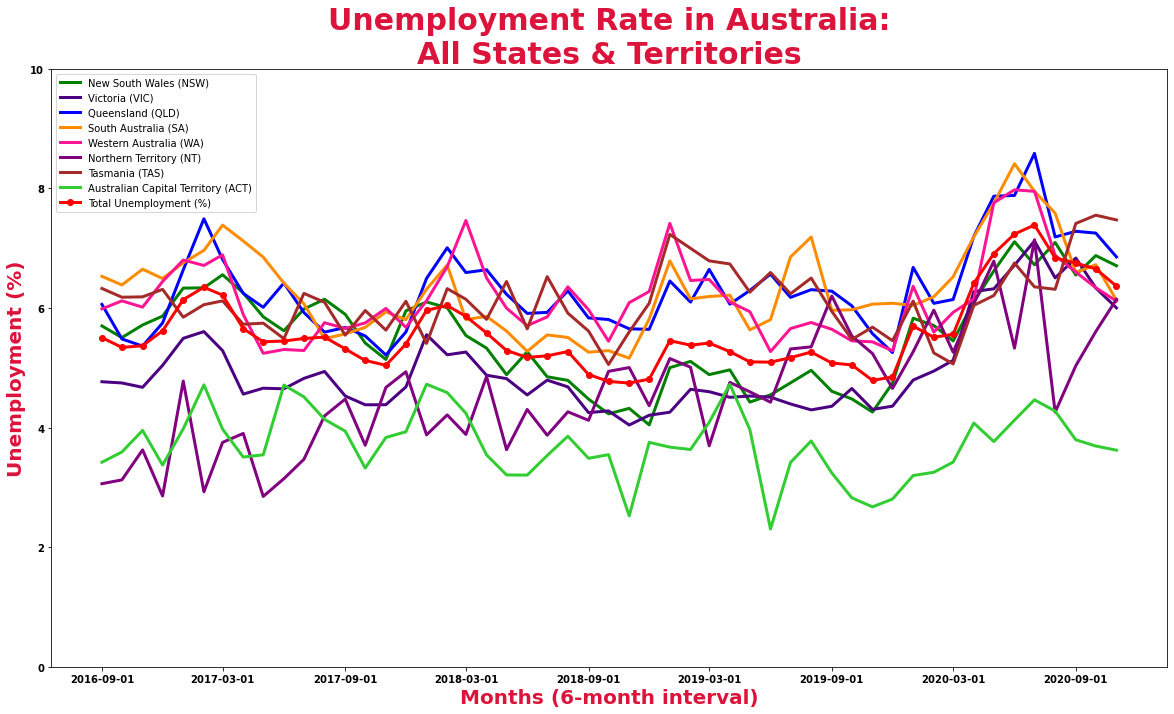

In [13]:
plt.figure(figsize = (20, 11))
ax = plt.gca()
plt.plot(filtered_data['Months'], filtered_data[cols_names[1]], c = 'green', label = 'New South Wales (NSW)', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[4]], c = 'indigo', label = 'Victoria (VIC)', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[7]], c = 'blue', label = 'Queensland (QLD)', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[10]], c = 'darkorange', label = 'South Australia (SA)', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[13]], c = 'deeppink', label = 'Western Australia (WA)', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[16]], c = 'purple', label = 'Northern Territory (NT)', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[19]], c = 'brown', label = 'Tasmania (TAS)', linewidth = 3)
plt.plot(filtered_data['Months'], filtered_data[cols_names[22]], c = 'limegreen', label = 'Australian Capital Territory (ACT)', linewidth = 3)
plt.plot(filtered_data['Months'], list(merged_dt['Australia ;  Unemployment rate ;  Persons ;']), '-or', label = 'Total Unemployment (%)', linewidth = 3)
plt.legend(loc = 'upper left')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.yticks([i for i in range(0, int(max(filtered_data[cols_names[1]]) + 5), 2)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Unemployment Rate in Australia:\nAll States & Territories', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Unemployment (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.savefig('graphs/unemployment_all_states.png')
plt.show()

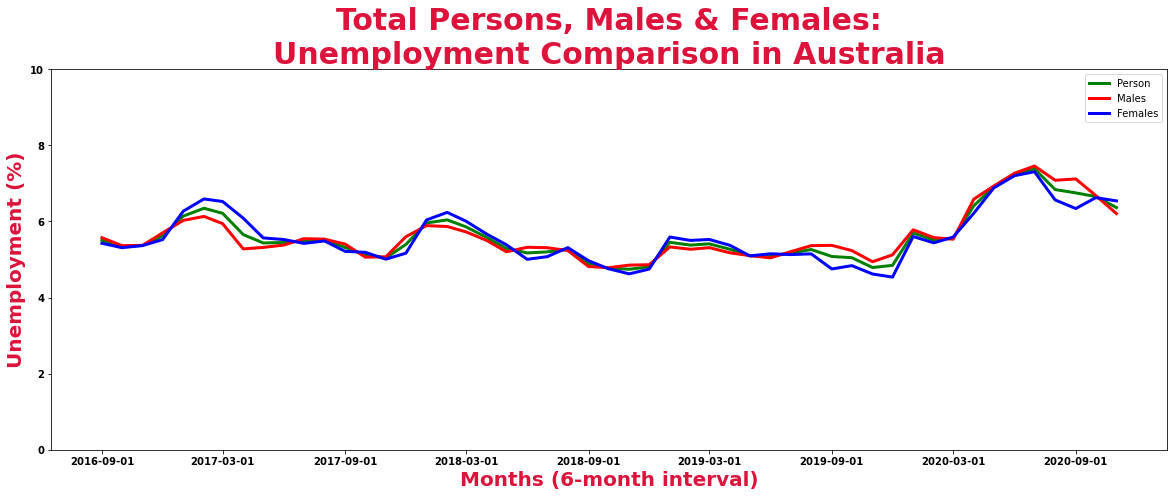

In [14]:
plt.figure(figsize = (20, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'], list(merged_dt['Australia ;  Unemployment rate ;  Persons ;']), '-g', label = 'Person', linewidth = 3)
plt.plot(filtered_data['Months'], list(merged_dt['Australia ;  Unemployment rate ;  > Males ;']), '-r', label = 'Males', linewidth = 3)
plt.plot(filtered_data['Months'], list(merged_dt['Australia ;  Unemployment rate ;  > Females ;']), '-b', label = 'Females', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.yticks([i for i in range(0, int(max(filtered_data[cols_names[1]]) + 5), 2)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Total Persons, Males & Females:\nUnemployment Comparison in Australia', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Unemployment (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

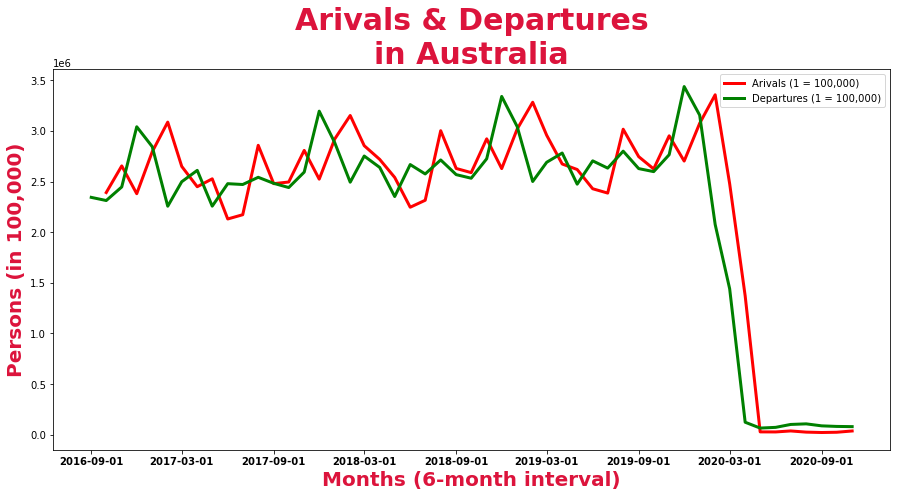

In [15]:
traval_file = pd.ExcelFile('data/travel.xls')
arrive_data = pd.read_excel(traval_file, 'Table 1.1')
depart_data = pd.read_excel(traval_file, 'Table 1.2')
arrive_data = arrive_data.iloc[8:]
depart_data = depart_data.iloc[8:]

arrive_sum = arrive_data.sum()
depart_sum = depart_data.sum()

plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'][1:], arrive_sum, '-r', label = 'Arivals (1 = 100,000)', linewidth = 3)
plt.plot(filtered_data['Months'], depart_sum, 'g', label = 'Departures (1 = 100,000)', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Arivals & Departures\nin Australia', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Persons (in 100,000)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

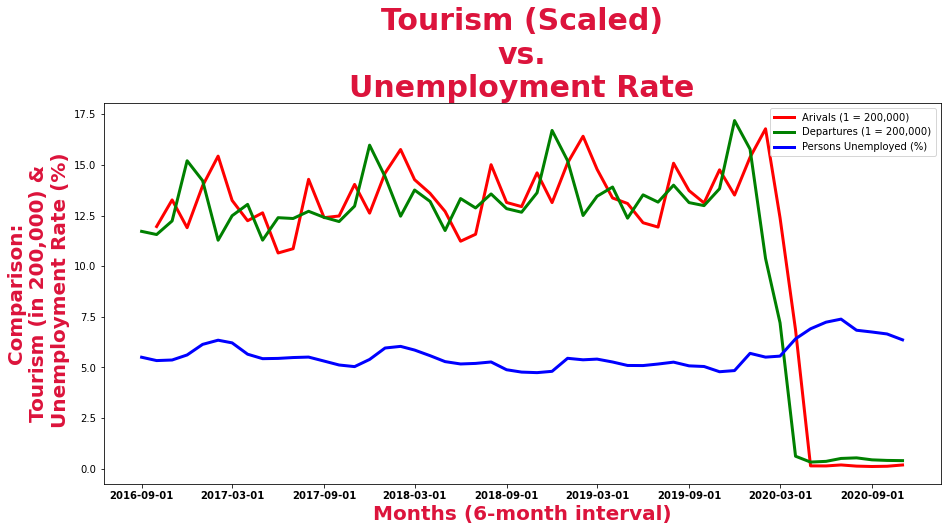

In [16]:
arrival_sum = arrive_sum / 200000
departure_sum = depart_sum / 200000

plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'][1:], arrival_sum, '-r', label = 'Arivals (1 = 200,000)', linewidth = 3)
plt.plot(filtered_data['Months'], departure_sum, 'g', label = 'Departures (1 = 200,000)', linewidth = 3)
plt.plot(filtered_data['Months'],list(merged_dt['Australia ;  Unemployment rate ;  Persons ;']), '-b', label = 'Persons Unemployed (%)', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Tourism (Scaled)\nvs.\nUnemployment Rate', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Comparison:\nTourism (in 200,000) &\n Unemployment Rate (%)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

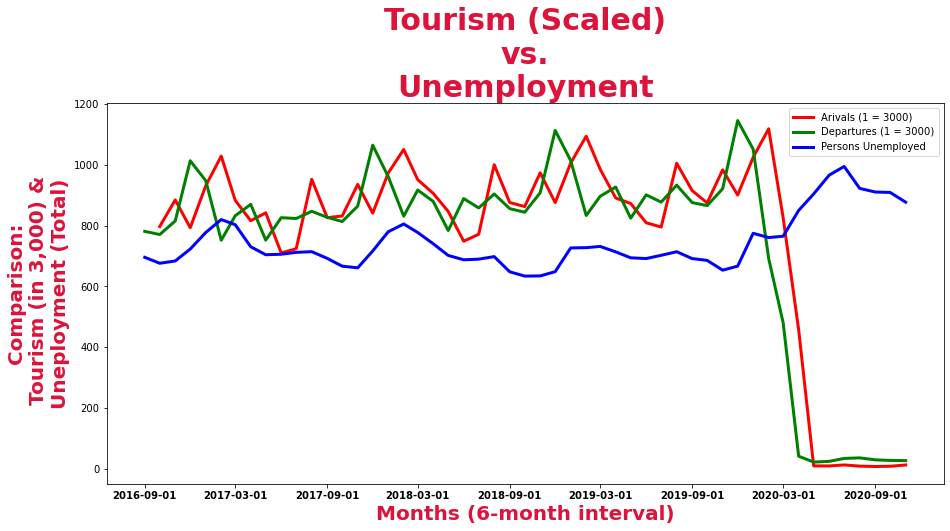

In [17]:
arrival_sum = arrive_sum / 3000
departure_sum = depart_sum / 3000

plt.figure(figsize = (15, 7))
ax = plt.gca()
plt.plot(filtered_data['Months'][1:], arrival_sum, '-r', label = 'Arivals (1 = 3000)', linewidth = 3)
plt.plot(filtered_data['Months'], departure_sum, 'g', label = 'Departures (1 = 3000)', linewidth = 3)
plt.plot(filtered_data['Months'],list(merged_dt['Australia ;  Unemployed total ;  Persons ;']), '-b', label = 'Persons Unemployed', linewidth = 3)
plt.legend(loc = 'upper right')
plt.xticks([filtered_data['Months'][i] for i in range(0, len(filtered_data['Months']), 6)], rotation = 'horizontal', fontweight = 'bold')
plt.title('Tourism (Scaled)\nvs.\nUnemployment', size = 30, c = 'crimson', fontweight = 'bold')
plt.xlabel('Months (6-month interval)', size = 20, c = 'crimson', fontweight = 'bold')
plt.ylabel('Comparison:\n Tourism (in 3,000) &\nUneployment (Total)', size = 20, c = 'crimson', fontweight = 'bold')
plt.show()

## State Unemployment Graphs

In [18]:
#Cut Index to 2016-2020

Vic_data_cut = Vic_Employment_data.iloc[294:353]  
QLD_data_cut = QLD_Employment_data.iloc[294:353]  
WA_data_cut = WA_Employment_data.iloc[294:353]  
Vic_data_cut.head()

,Unnamed: 0,Date,Month,Year,> Victoria ; Unemployment rate ; Persons ;,> Victoria ; Unemployment rate ; > Males ;,> Victoria ; Unemployment rate ; > Females ;
294,294,Jan-16,Jan,2016,6.9,6.7,7.2
295,295,Feb-16,Feb,2016,6.2,6.0,6.4
296,296,Mar-16,Mar,2016,6.0,5.6,6.5
297,297,Apr-16,Apr,2016,5.7,5.1,6.4
298,298,May-16,May,2016,5.7,5.1,6.4


In [19]:
#Select Male/Female Data
Vic_T = Vic_data_cut["> Victoria ;  Unemployment rate ;  Persons ;"]

Vic_M = Vic_data_cut["> Victoria ;  Unemployment rate ;  > Males ;"]

Vic_F = Vic_data_cut["> Victoria ;  Unemployment rate ;  > Females ;"]

WA_T = WA_data_cut["> Western Australia ;  Unemployment rate ;  Persons ;"]

WA_M = WA_data_cut["> Western Australia ;  Unemployment rate ;  > Males ;"]

WA_F = WA_data_cut["> Western Australia ;  Unemployment rate ;  > Females ;"]

QLD_T = QLD_data_cut["> Queensland ;  Unemployment rate ;  Persons ;"]

QLD_M = QLD_data_cut["> Queensland ;  Unemployment rate ;  > Males ;"]

QLD_F = QLD_data_cut["> Queensland ;  Unemployment rate ;  > Females ;"]

In [20]:
#Create Function for setting x and plotting
#x = length of date column
#3 Graphs for each state comparing unemployment over time for male and female line.
Time = Vic_data_cut["Date"]
def make_line(t,m,f,ylab,title):
    fig = plt.figure(figsize= (8,6))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    
    plt.plot(Time,m, '-b',label = 'Male',alpha = 0.5)
    plt.plot(Time,f,'-r',label='Female',alpha = 0.4)
    plt.plot(Time,t,'-g',label='Total Persons',alpha = 0.3)

    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel(ylab)

    s,p = st.ttest_ind(m,f)
    covid_line = plt.axvline(x=49,color = 'k',linestyle='--',alpha = 0.3)
    covid_line.set_label('PHE')
    ax.legend(loc='upper left',fancybox=True, framealpha=0.5)
    
    plt.text(0.2, 0.05, f"p_value = {round(p,5)}", horizontalalignment='center',verticalalignment='top', transform=ax.transAxes)

    ax.set_xticks([1,7,13,19,25,31,37,43,49,55,61])
    ax.set_xticklabels(['Jan-16','July-16','Jan-17','July-17','Jan-18','July-18','Jan-19','July-19','Jan-20','July-20'])
    plt.xticks(rotation=20)



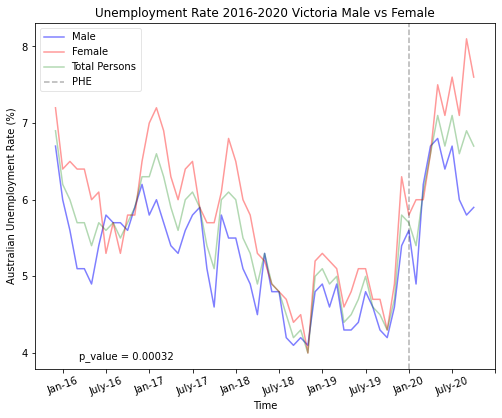

In [21]:
make_line(Vic_T,Vic_M,Vic_F,"Australian Unemployment Rate (%)","Unemployment Rate 2016-2020 Victoria Male vs Female")
plt.savefig('graphs/Vic_Gender.png')
plt.show()

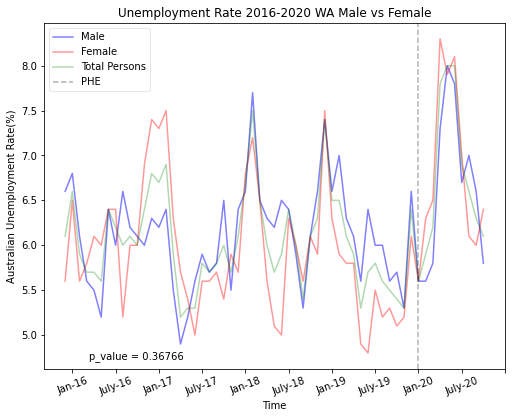

In [22]:
make_line(WA_T,WA_M,WA_F,"Australian Unemployment Rate(%)","Unemployment Rate 2016-2020 WA Male vs Female")
plt.savefig('graphs/WA_Gender.png')
plt.show()

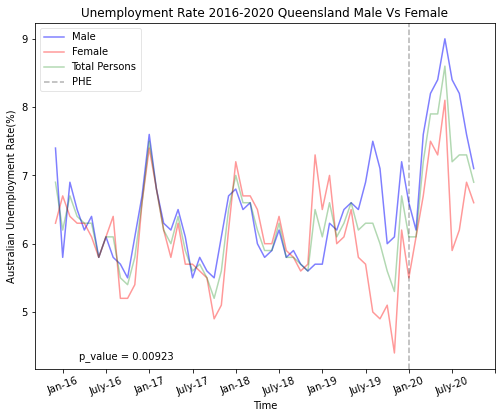

In [23]:
make_line(QLD_T,QLD_M,QLD_F,"Australian Unemployment Rate(%)","Unemployment Rate 2016-2020 Queensland Male Vs Female")
plt.savefig("graphs/QLD_Gender.png")
plt.show()

## Arrivals vs. Unemployment Graphs

In [24]:
arrivals_df.head()

,Unnamed: 0,Australia,Norfolk Island,Australian External Territories nec,New Zealand,New Caledonia,Papua New Guinea,Solomon Islands,Vanuatu,Guam,...,Seychelles,Somalia,South Africa,Eswatini,Tanzania,Uganda,Zambia,Zimbabwe,"S & E Afr, nec",Inadequately Described
0,Sep-2016,"788,680",0,0,"166,800",0,"3,420",550,470,0,...,50,30,"5,730",0,80,50,100,490,0,"2,280"
1,Oct-2016,"907,430",0,0,"176,580",0,"3,300",500,570,0,...,30,40,"5,850",0,70,70,90,470,0,"3,330"
2,Nov-2016,"649,150",0,0,"144,860",0,"3,290",660,640,0,...,30,40,"5,810",0,70,60,80,470,0,740
3,Dec-2016,"647,520",0,0,"162,290",0,"5,350",750,440,0,...,110,20,"11,250",10,90,100,120,810,0,530
4,Jan-2017,"1,049,590",0,0,"174,900",0,"4,130",620,560,0,...,50,30,"6,700",0,120,110,170,790,0,450


In [25]:
# Altering arrivals data
arrivals_df.drop(arrivals_df.columns[0], axis=1, inplace=True) 
arrivals_df.head()

,Australia,Norfolk Island,Australian External Territories nec,New Zealand,New Caledonia,Papua New Guinea,Solomon Islands,Vanuatu,Guam,Kiribati,...,Seychelles,Somalia,South Africa,Eswatini,Tanzania,Uganda,Zambia,Zimbabwe,"S & E Afr, nec",Inadequately Described
0,"788,680",0,0,"166,800",0,"3,420",550,470,0,70,...,50,30,"5,730",0,80,50,100,490,0,"2,280"
1,"907,430",0,0,"176,580",0,"3,300",500,570,0,100,...,30,40,"5,850",0,70,70,90,470,0,"3,330"
2,"649,150",0,0,"144,860",0,"3,290",660,640,0,100,...,30,40,"5,810",0,70,60,80,470,0,740
3,"647,520",0,0,"162,290",0,"5,350",750,440,0,80,...,110,20,"11,250",10,90,100,120,810,0,530
4,"1,049,590",0,0,"174,900",0,"4,130",620,560,0,80,...,50,30,"6,700",0,120,110,170,790,0,450


In [26]:
#Defining unemployment data
unemployment_df.reset_index(inplace = True, drop = True)
unemployment_df.head ()

,Date,Month,Year,Australia ; Employed total ; Persons ;,Australia ; Employed total ; > Males ;,Australia ; Employed total ; > Females ;,Australia ; > Employed full-time ; Persons ;,Australia ; > Employed full-time ; > Males ;,Australia ; > Employed full-time ; > Females ;,Australia ; > Employed part-time ; Persons ;,...,> Australian Capital Territory ; Labour force total ; > Females ;,> Australian Capital Territory ; Participation rate ; Persons ;,> Australian Capital Territory ; Participation rate ; > Males ;,> Australian Capital Territory ; Participation rate ; > Females ;,> Australian Capital Territory ; Not in the labour force (NILF) ; Persons ;,> Australian Capital Territory ; Not in the labour force (NILF) ; > Males ;,> Australian Capital Territory ; Not in the labour force (NILF) ; > Females ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; Persons ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; > Males ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; > Females ;
0,Jul-91,Jul,1991,7583.0,4398.2,3184.8,5900.9,4007.4,1893.5,1682.1,...,71.0,72.5,81.6,63.9,59.4,19.3,40.0,216.1,105.1,111.0
1,Aug-91,Aug,1991,7620.7,4398.6,3222.1,5902.2,3993.3,1908.9,1718.5,...,70.5,71.7,80.4,63.4,61.3,20.6,40.7,216.5,105.3,111.2
2,Sep-91,Sep,1991,7713.2,4446.1,3267.1,5952.3,4025.2,1927.1,1760.9,...,71.8,72.3,80.6,64.5,60.0,20.4,39.6,216.9,105.4,111.4
3,Oct-91,Oct,1991,7638.0,4426.2,3211.7,5955.2,4034.2,1921.0,1682.7,...,70.6,71.0,79.3,63.2,62.9,21.9,41.0,217.2,105.6,111.6
4,Nov-91,Nov,1991,7614.9,4408.3,3206.7,5853.8,3980.7,1873.2,1761.1,...,70.3,70.7,78.9,62.9,63.7,22.3,41.5,217.5,105.7,111.8


In [27]:
unemployment_df.drop(unemployment_df.columns[[1,2]], axis=1, inplace=True) 
unemployment_df.head()

,Date,Australia ; Employed total ; Persons ;,Australia ; Employed total ; > Males ;,Australia ; Employed total ; > Females ;,Australia ; > Employed full-time ; Persons ;,Australia ; > Employed full-time ; > Males ;,Australia ; > Employed full-time ; > Females ;,Australia ; > Employed part-time ; Persons ;,Australia ; > Employed part-time ; > Males ;,Australia ; > Employed part-time ; > Females ;,...,> Australian Capital Territory ; Labour force total ; > Females ;,> Australian Capital Territory ; Participation rate ; Persons ;,> Australian Capital Territory ; Participation rate ; > Males ;,> Australian Capital Territory ; Participation rate ; > Females ;,> Australian Capital Territory ; Not in the labour force (NILF) ; Persons ;,> Australian Capital Territory ; Not in the labour force (NILF) ; > Males ;,> Australian Capital Territory ; Not in the labour force (NILF) ; > Females ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; Persons ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; > Males ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; > Females ;
0,Jul-91,7583.0,4398.2,3184.8,5900.9,4007.4,1893.5,1682.1,390.8,1291.2,...,71.0,72.5,81.6,63.9,59.4,19.3,40.0,216.1,105.1,111.0
1,Aug-91,7620.7,4398.6,3222.1,5902.2,3993.3,1908.9,1718.5,405.3,1313.2,...,70.5,71.7,80.4,63.4,61.3,20.6,40.7,216.5,105.3,111.2
2,Sep-91,7713.2,4446.1,3267.1,5952.3,4025.2,1927.1,1760.9,420.9,1340.0,...,71.8,72.3,80.6,64.5,60.0,20.4,39.6,216.9,105.4,111.4
3,Oct-91,7638.0,4426.2,3211.7,5955.2,4034.2,1921.0,1682.7,392.0,1290.7,...,70.6,71.0,79.3,63.2,62.9,21.9,41.0,217.2,105.6,111.6
4,Nov-91,7614.9,4408.3,3206.7,5853.8,3980.7,1873.2,1761.1,427.6,1333.5,...,70.3,70.7,78.9,62.9,63.7,22.3,41.5,217.5,105.7,111.8


In [28]:
#drop all NaN's 
unemployment_df.dropna

#Creating a lock so we are only looking at the data we are using 
unemployment_clean = unemployment_df.iloc[302:353, 0:2]
unemployment_clean.head()

,Date,Australia ; Employed total ; Persons ;
302,Sep-16,11944.4
303,Oct-16,11988.7
304,Nov-16,12054.0
305,Dec-16,12149.2
306,Jan-17,11885.9


In [29]:
#Reset the index 
unemployment_clean = unemployment_clean.reset_index(drop=True)
unemployment_clean.head()

,Date,Australia ; Employed total ; Persons ;
0,Sep-16,11944.4
1,Oct-16,11988.7
2,Nov-16,12054.0
3,Dec-16,12149.2
4,Jan-17,11885.9


In [30]:
#Rename the column headings 
unemployment_clean.columns= ['Date', 'Australian Unemployment rate: Persons']
unemployment_clean.head()

,Date,Australian Unemployment rate: Persons
0,Sep-16,11944.4
1,Oct-16,11988.7
2,Nov-16,12054.0
3,Dec-16,12149.2
4,Jan-17,11885.9


In [31]:
#Creating a lock so we are only looking at the data we are using
arrivals_df
arrivals_df = arrivals_df.iloc[0:51, 0:2]
arrivals_df.columns= ['Arrivals in Australia', 'Date']
arrivals_df['Date'] = pd.date_range(start='09/2016', periods=len(arrivals_df), freq='M')


arrivals_df.head()

,Arrivals in Australia,Date
0,"788,680",2016-09-30
1,"907,430",2016-10-31
2,"649,150",2016-11-30
3,"647,520",2016-12-31
4,"1,049,590",2017-01-31


In [32]:
#converting data types
arrivals_df["Arrivals in Australia"] = arrivals_df["Arrivals in Australia"].astype('str')
arrivals_df["Arrivals in Australia"] = arrivals_df["Arrivals in Australia"].str.replace(",","").astype(float)
arrivals_df.dtypes

Arrivals in Australia           float64
Date                     datetime64[ns]
dtype: object

In [33]:
#checking data output
arrivals_df.head()

,Arrivals in Australia,Date
0,788680.0,2016-09-30
1,907430.0,2016-10-31
2,649150.0,2016-11-30
3,647520.0,2016-12-31
4,1049590.0,2017-01-31


In [34]:
#merging employment rate and arrivals 
merged_df = pd.merge(unemployment_clean, arrivals_df, left_index=True, right_index=True)
merged_df.head()

,Date_x,Australian Unemployment rate: Persons,Arrivals in Australia,Date_y
0,Sep-16,11944.4,788680.0,2016-09-30
1,Oct-16,11988.7,907430.0,2016-10-31
2,Nov-16,12054.0,649150.0,2016-11-30
3,Dec-16,12149.2,647520.0,2016-12-31
4,Jan-17,11885.9,1049590.0,2017-01-31


In [35]:
merged_df.dtypes

Date_x                                           object
Australian Unemployment rate: Persons           float64
Arrivals in Australia                           float64
Date_y                                   datetime64[ns]
dtype: object

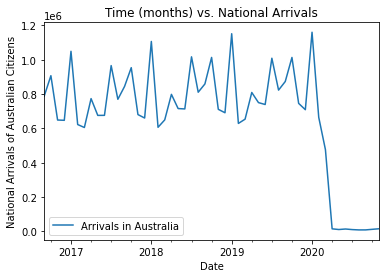

In [36]:
#line graph of national arrivals over time 
graph = arrivals_df.plot(kind = "line", x = "Date", title = "Time (months) vs. National Arrivals")
plt.ylabel("National Arrivals of Australian Citizens")

plt.show()

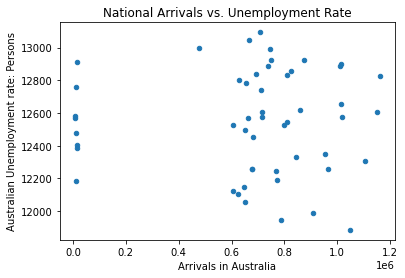

In [37]:
#unemployment rate (y axis) % vs national arrivals of australians (x axis)
graph = merged_df.plot(kind = "scatter", x = "Arrivals in Australia", 
                       y = "Australian Unemployment rate: Persons", title = "National Arrivals vs. Unemployment Rate")

# Saving image
plt.savefig('graphs/arrivals_vs_unemployment.png')


The correlation coefficient is: r = -0.0058.
The r squared value is: 0.0.


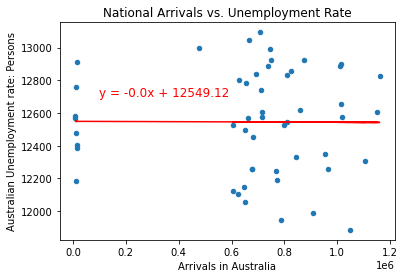

In [38]:
#regression line 
graph = merged_df.plot(kind = "scatter", x = "Arrivals in Australia", 
                       y = "Australian Unemployment rate: Persons", title = "National Arrivals vs. Unemployment Rate")

x_value = merged_df["Arrivals in Australia"]
y_value = merged_df["Australian Unemployment rate: Persons"] 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(100000, 12700), fontsize=12,color="red") 

print(f"The correlation coefficient is: r = {round(rvalue, 4)}.")
print(f"The r squared value is: {round(rvalue**2, 4)}.")

plt.savefig('graphs/arrivals_unemployment.png')
plt.show()

In [39]:
#before covid pandemic 
pre_covid_df = merged_df.iloc[0:41, :]
pre_covid_df.tail()

,Date_x,Australian Unemployment rate: Persons,Arrivals in Australia,Date_y
36,Sep-19,12925.9,873520.0,2019-09-30
37,Oct-19,12898.5,1013740.0,2019-10-31
38,Nov-19,12992.5,746080.0,2019-11-30
39,Dec-19,13093.2,709350.0,2019-12-31
40,Jan-20,12827.4,1160610.0,2020-01-31


In [40]:
#reset the index 
pre_covid_df.reset_index(drop=True)
pre_covid_df.head()

,Date_x,Australian Unemployment rate: Persons,Arrivals in Australia,Date_y
0,Sep-16,11944.4,788680.0,2016-09-30
1,Oct-16,11988.7,907430.0,2016-10-31
2,Nov-16,12054.0,649150.0,2016-11-30
3,Dec-16,12149.2,647520.0,2016-12-31
4,Jan-17,11885.9,1049590.0,2017-01-31


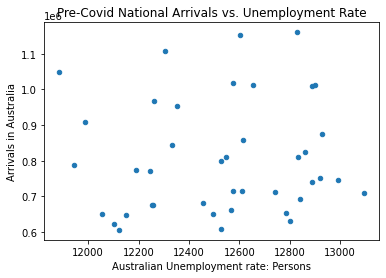

In [41]:
#make a scatter plot 
graph = pre_covid_df.plot(kind = "scatter", x = "Australian Unemployment rate: Persons", 
                       y = "Arrivals in Australia", title = "Pre-Covid National Arrivals vs. Unemployment Rate")

# Saving image
plt.savefig('graphs/Pre-Covid_arrival_vs_unemployment.png')

The correlation coefficient is: r = 0.0601.
The r-squared value is: 0.0036.


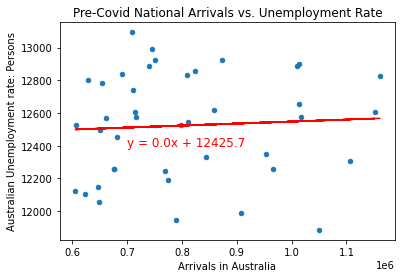

In [42]:
#linear regression 
graph = pre_covid_df.plot(kind = "scatter",
                          x = "Arrivals in Australia",
                          y = "Australian Unemployment rate: Persons",
                          title = "Pre-Covid National Arrivals vs. Unemployment Rate"
                         )

x_value = pre_covid_df["Arrivals in Australia"]
y_value = pre_covid_df["Australian Unemployment rate: Persons"] 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (700000, 12400), fontsize = 12, color = "red") 

print(f"The correlation coefficient is: r = {round(rvalue, 4)}.")
print(f"The r-squared value is: {round(rvalue ** 2, 4)}.")

plt.savefig('graphs/pre_covid_arrivals_lin_reg.png')
plt.show()

In [43]:
#after covid was declared pandemic 
covid_df = merged_df.iloc[41:51, :]
covid_df

,Date_x,Australian Unemployment rate: Persons,Arrivals in Australia,Date_y
41,Feb-20,13048.2,664990.0,2020-02-29
42,Mar-20,12999.4,476430.0,2020-03-31
43,Apr-20,12407.5,15060.0,2020-04-30
44,May-20,12186.6,11110.0,2020-05-31
45,Jun-20,12387.8,14070.0,2020-06-30
46,Jul-20,12475.2,10700.0,2020-07-31
47,Aug-20,12572.4,8790.0,2020-08-31
48,Sep-20,12583.0,8900.0,2020-09-30
49,Oct-20,12756.9,12280.0,2020-10-31
50,Nov-20,12909.0,15500.0,2020-11-30


In [44]:
#reset the index 
covid_df.reset_index(drop=True)
covid_df.head()

,Date_x,Australian Unemployment rate: Persons,Arrivals in Australia,Date_y
41,Feb-20,13048.2,664990.0,2020-02-29
42,Mar-20,12999.4,476430.0,2020-03-31
43,Apr-20,12407.5,15060.0,2020-04-30
44,May-20,12186.6,11110.0,2020-05-31
45,Jun-20,12387.8,14070.0,2020-06-30


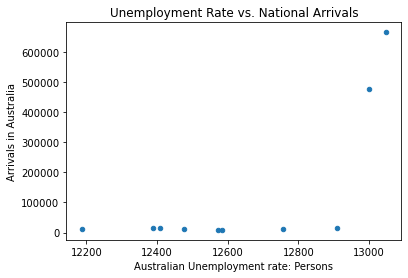

In [45]:
#make the scatter plot
graph = covid_df.plot(kind = "scatter", x = "Australian Unemployment rate: Persons", 
                       y = "Arrivals in Australia", title = "Unemployment Rate vs. National Arrivals")

#save the image
plt.savefig('graphs/Covid_arrival_vs_unemployment.png')

The correlation coefficient is: r = 0.7155.
The r-squared value is: 0.512.


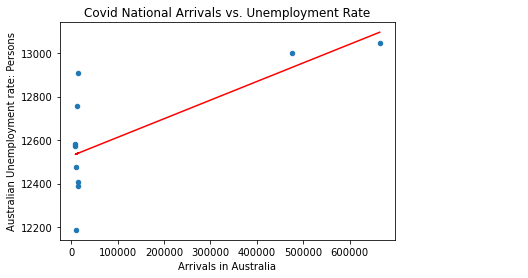

In [46]:
#Regression line 
#linear regression 
graph = covid_df.plot(kind = "scatter",
                          x = "Arrivals in Australia",
                          y = "Australian Unemployment rate: Persons",
                          title = "Covid National Arrivals vs. Unemployment Rate"
                         )

x_value = covid_df["Arrivals in Australia"]
y_value = covid_df["Australian Unemployment rate: Persons"] 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (700000, 12400), fontsize = 12, color = "red") 

print(f"The correlation coefficient is: r = {round(rvalue, 4)}.")
print(f"The r-squared value is: {round(rvalue ** 2, 4)}.")

plt.savefig('graphs/covid_arrivals_lin_reg.png')
plt.show()

## Departures vs. Unemployment Graphs

#### Cleaning Data

In [47]:
# Cutting unemployment_df to only contain the same date range as departures_df
# Limiting from row 302 to 353 to contain monthly data from Sep 2016, to Nov 2020
# Also limiting the columns to what is required
unemployment_valid_dates = unemployment_df_dep.iloc[302:353, 1:5]
unemployment_valid_dates.head()

,Date,Month,Year,Australia ; Unemployment rate ; Persons ;
302,Sep-16,Sep,2016,5.5
303,Oct-16,Oct,2016,5.3
304,Nov-16,Nov,2016,5.4
305,Dec-16,Dec,2016,5.6
306,Jan-17,Jan,2017,6.1


In [48]:
# Resetting index
unemployment_valid_dates = unemployment_valid_dates.reset_index(drop=True)
unemployment_valid_dates.head()

,Date,Month,Year,Australia ; Unemployment rate ; Persons ;
0,Sep-16,Sep,2016,5.5
1,Oct-16,Oct,2016,5.3
2,Nov-16,Nov,2016,5.4
3,Dec-16,Dec,2016,5.6
4,Jan-17,Jan,2017,6.1


In [49]:
# Renaming Column
unemployment_clean_dep = unemployment_valid_dates.rename(columns = {f"{unemployment_df_dep.columns[4]}":"Australian Unemployment rate: Persons (%)"})

In [50]:
# Previewing data
unemployment_clean_dep.head()

,Date,Month,Year,Australian Unemployment rate: Persons (%)
0,Sep-16,Sep,2016,5.5
1,Oct-16,Oct,2016,5.3
2,Nov-16,Nov,2016,5.4
3,Dec-16,Dec,2016,5.6
4,Jan-17,Jan,2017,6.1


In [51]:
# Cleaning departures_df
# Only require first two rows 
departures = departures_df.iloc[:, 0:2]
departures.head()

,Unnamed: 0,Australia
0,Sep-2016,"866,140"
1,Oct-2016,"701,180"
2,Nov-2016,"655,800"
3,Dec-2016,"956,990"
4,Jan-2017,"732,790"


In [52]:
# Renaming column
departures = departures.rename(columns={"Australia": "National Departures of Australian Citizens", 
                                        "Unnamed: 0": "Flight Month"})
departures.head()

,Flight Month,National Departures of Australian Citizens
0,Sep-2016,"866,140"
1,Oct-2016,"701,180"
2,Nov-2016,"655,800"
3,Dec-2016,"956,990"
4,Jan-2017,"732,790"


In [53]:
# Converting data type of 'National Arrivals of Australian Citizens' column 
# First converting column of objects to strings
departures["National Departures of Australian Citizens"] = departures["National Departures of Australian Citizens"].astype('str')


In [54]:
# Then removing the commas and converting the data type to float
departures["National Departures of Australian Citizens"] = departures["National Departures of Australian Citizens"].str.replace(",","").astype(float)


In [55]:
# Confirming datatype
departures.dtypes

Flight Month                                   object
National Departures of Australian Citizens    float64
dtype: object

In [56]:
# Previewing dataframe
departures.head()

,Flight Month,National Departures of Australian Citizens
0,Sep-2016,866140.0
1,Oct-2016,701180.0
2,Nov-2016,655800.0
3,Dec-2016,956990.0
4,Jan-2017,732790.0


#### Merging DataFrames

In [57]:
# Merging the two dataframes on index
merged_df = pd.merge(unemployment_clean_dep, departures, left_index=True, right_index=True)
merged_df.head()

# Can confirm that the two required columns in merged_df ('Australian Unemployment rate: Persons' and 'National 
# Arrivals of Australian Citizens') are listed in corresponding order for later plotting

,Date,Month,Year,Australian Unemployment rate: Persons (%),Flight Month,National Departures of Australian Citizens
0,Sep-16,Sep,2016,5.5,Sep-2016,866140.0
1,Oct-16,Oct,2016,5.3,Oct-2016,701180.0
2,Nov-16,Nov,2016,5.4,Nov-2016,655800.0
3,Dec-16,Dec,2016,5.6,Dec-2016,956990.0
4,Jan-17,Jan,2017,6.1,Jan-2017,732790.0


#### Plotting

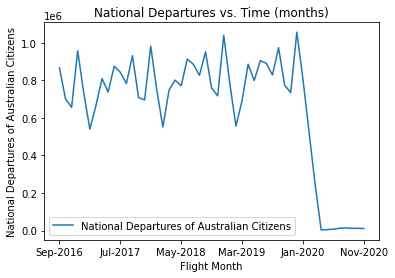

In [58]:
# Plotting a line graph of National Departures vs. Time
graph = departures.plot(kind = "line", x = "Flight Month", title = "National Departures vs. Time (months)")
plt.ylabel("National Departures of Australian Citizens")

# saving image
plt.savefig('graphs/departures_vs_time.png')

plt.show()

The line graph above shows a general pattern in the number of national departures of Australian citizens across the time data has been recorded. Visually, three cycles of a pattern is visible. These cycles appear to last for the span of a year and show that there had been a trend in the number of Australian citizens departing the country monthly. However, this pattern stops following Jan-2020 when there is a sharp decline in the number of departures. This low number continues for the remainder of the year.

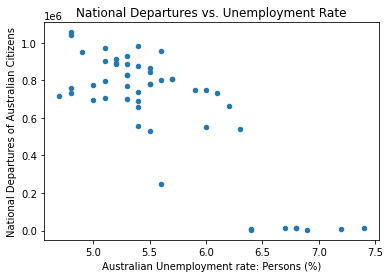

In [59]:
# Plotting data following confirmation that the two required columns are listed in corresponding order
graph = merged_df.plot(kind = "scatter", x = "Australian Unemployment rate: Persons (%)", y = "National Departures of Australian Citizens", title = "National Departures vs. Unemployment Rate")


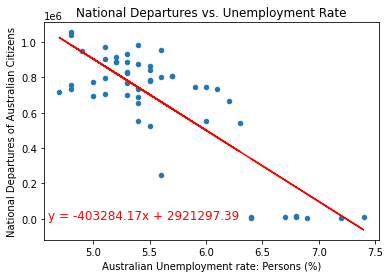

The correlation coefficient is: r = -0.8316.
The r squared value is: 0.6915.


In [60]:
# Calculating linear regression 

# Plotting the scatterplot
graph = merged_df.plot(kind = "scatter", x = "Australian Unemployment rate: Persons (%)", 
                       y = "National Departures of Australian Citizens", title = "National Departures vs. Unemployment Rate")
#Setting variables
x_value = merged_df["Australian Unemployment rate: Persons (%)"]
y_value = merged_df["National Departures of Australian Citizens"]

# Calculating the regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the regression line
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(4.6,0), fontsize=12,color="red")

# Saving image
plt.savefig('graphs/departures_vs_unemployment_regression.png')

# Show plot
plt.show()

# Printing r value
print(f"The correlation coefficient is: r = {round(rvalue, 4)}.")

# Printing r squared value
print(f"The r squared value is: {round(rvalue**2, 4)}.")

The above scatterplot shows the relationship between National Departures of Australian Citizens and Australian Unemployment rate: Persons, focusing only on data acquired between September 2016 and November 2020. The correlation coefficient of r = -0.8316 shows there is a strong, negative, linear relationship between the two variables. The negative relationship means that as the unemployment rate increases, the national departures of Australian citizens decreases. The r squared value indicates that within this regression model, 69% of the variation in the National Departures of Australian Citizens can be explained by the variation in Australian Unemployment rate: Persons.

#### Pre Covid

In [61]:
# Considering the correlaiton between unemployment and national departures in the time pre covid
# WHO declared Covid-19 a public health emergency on Jan 30 2020, so considering up to and including Jan 2020 as pre covid
# SO pre covid is Sep 2016 to Jan 2020
pre_covid_df = merged_df.iloc[0:41, :]
pre_covid_df.tail()

,Date,Month,Year,Australian Unemployment rate: Persons (%),Flight Month,National Departures of Australian Citizens
36,Sep-19,Sep,2019,5.1,Sep-2019,973600.0
37,Oct-19,Oct,2019,5.0,Oct-2019,773880.0
38,Nov-19,Nov,2019,4.8,Nov-2019,734570.0
39,Dec-19,Dec,2019,4.8,Dec-2019,1056000.0
40,Jan-20,Jan,2020,5.7,Jan-2020,807880.0


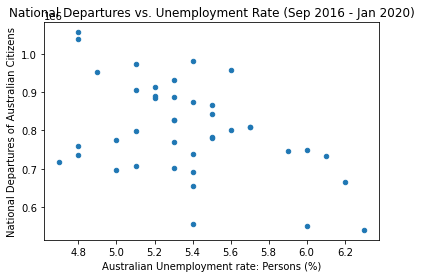

In [62]:
# Plotting data following confirmation that the two required columns are listed in corresponding order
graph = pre_covid_df.plot(kind = "scatter", x = "Australian Unemployment rate: Persons (%)", 
                       y = "National Departures of Australian Citizens", title = "National Departures vs. Unemployment Rate (Sep 2016 - Jan 2020)")


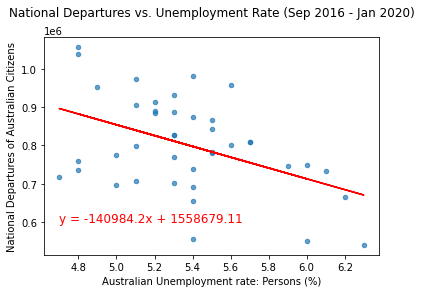

The correlation coefficient is: r = -0.4503.
The r squared value is: 0.2028.


In [63]:
# Calculating linear regression 

# Plotting the scatterplot
graph = pre_covid_df.plot(kind = "scatter", x = "Australian Unemployment rate: Persons (%)", 
                       y = "National Departures of Australian Citizens", title = "National Departures vs. Unemployment Rate (Sep 2016 - Jan 2020)\n",
                         alpha = 0.7)
#Setting variables
x_value = pre_covid_df["Australian Unemployment rate: Persons (%)"]
y_value = pre_covid_df["National Departures of Australian Citizens"]

# Calculating the regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the regression line
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(4.7,600000), fontsize=12,color="red")

# Saving image
plt.savefig('graphs/departures_vs_unemployment_regression_precovid.png')

# Show plot
plt.show()

# Printing r value
print(f"The correlation coefficient is: r = {round(rvalue, 4)}.")

# Printing r squared value
print(f"The r squared value is: {round(rvalue**2, 4)}.")

The above scatterplot shows the relationship between National Departures of Australian Citizens and Australian Unemployment rate: Persons, focusing only on data acquired between September 2016 and January 2020. The correlation coefficient of r = -0.4503 shows there is a weak, negative relationship between the two variables. The r squared value indicates that within this regression model, 20% of the variation in National Departures of Australian Citizens can be explained by the variation in Australian Unemployment rate: Persons. The correlation coefficient and r squared value indicate that the data does not fit the linear regression model.

#### Covid

In [64]:
# Considering the correlaiton between unemployment and national departures in the time during covid
# WHO declared Covid-19 a pandemic on Jan 30 2020, so considering from Feb 2020 as during covid
covid_df = merged_df.iloc[41:51, :]
covid_df

,Date,Month,Year,Australian Unemployment rate: Persons (%),Flight Month,National Departures of Australian Citizens
41,Feb-20,Feb,2020,5.5,Feb-2020,527820.0
42,Mar-20,Mar,2020,5.6,Mar-2020,247510.0
43,Apr-20,Apr,2020,6.4,Apr-2020,3480.0
44,May-20,May,2020,6.9,May-2020,5050.0
45,Jun-20,Jun,2020,7.2,Jun-2020,7280.0
46,Jul-20,Jul,2020,7.4,Jul-2020,12310.0
47,Aug-20,Aug,2020,6.8,Aug-2020,14330.0
48,Sep-20,Sep,2020,6.8,Sep-2020,11740.0
49,Oct-20,Oct,2020,6.7,Oct-2020,11860.0
50,Nov-20,Nov,2020,6.4,Nov-2020,10950.0


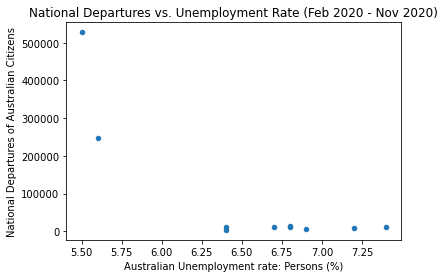

In [65]:
# Plotting data following confirmation that the two required columns are listed in corresponding order
graph = covid_df.plot(kind = "scatter", x = "Australian Unemployment rate: Persons (%)", 
                       y = "National Departures of Australian Citizens", title = "National Departures vs. Unemployment Rate (Feb 2020 - Nov 2020)")


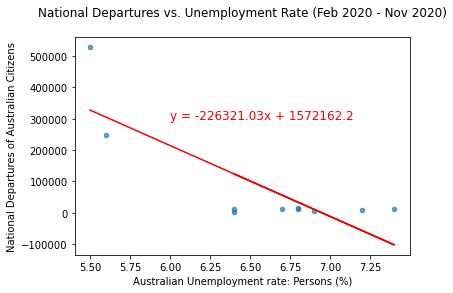

The correlation coefficient is: r = -0.8132.
The r squared value is: 0.6613.


In [66]:
# Calculating linear regression 

# Plotting the scatterplot
graph = covid_df.plot(kind = "scatter", x = "Australian Unemployment rate: Persons (%)", 
                       y = "National Departures of Australian Citizens", title = "National Departures vs. Unemployment Rate (Feb 2020 - Nov 2020)\n", 
                      alpha = 0.7)
#Setting variables
x_value = covid_df["Australian Unemployment rate: Persons (%)"]
y_value = covid_df["National Departures of Australian Citizens"]

# Calculating the regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the regression line
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(6,300000), fontsize=12,color="red")

# Saving image
plt.savefig('graphs/departures_vs_unemployment_regression_covid.png')

# Show plot
plt.show()

# Printing r value
print(f"The correlation coefficient is: r = {round(rvalue, 4)}.")

# Printing r squared value
print(f"The r squared value is: {round(rvalue**2, 4)}.")

The above scatterplot shows the relationship between National Departures of Australian Citizens and Australian Unemployment rate: Persons, focusing only on data acquired between February 2020 and November 2020. The correlation coefficient of r = -0.8132 indicates there is a strong, negative, linear relationship between the two variables. The negative relationship means that as the unemployment rate increases, the national departures of Australian citizens decreases. The r squared value indicates that within this regression model, 66% of the variation in the National Departures of Australian Citizens can be explained by the variation in Australian Unemployment rate: Persons.

It is important to note that this plot contains significantly less data points than the other plots, which may affect the outcome. Based on the data, the linear regression model has also produced negative values for national departures. This is not suitable, nor logical considering the context of the data. This indicates that although the r and r squared values imply a linear relationship, the data may actually not support the linear regresion model.